In [1]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Operator

class EGR():
    """ Class to construct the EGR variational circuit."""

    def __init__(self, n_qubits, depth=1):
        """Constructor.
        
        Args:
            n_qubits (int): number of qubits of the circuit.
        """
        super().__init__()
        self.n_qubits = n_qubits
        self.depth = depth
        self.num_parameters = int(2**self.n_qubits-1)
        self.num_cx = self.num_entangling_gates()
    
    def num_entangling_gates(self):
        """
        Obtain the number of entangling gates.
        """
        num_cx = 0
        for target in range(self.n_qubits):
            last = 2**target-1
            for l in range(2**target):
                for control in range(target):
                    if (last ^ l) & (1 << (target-control-1)):
                        num_cx += 1
                        break
                last = l
        return num_cx

    def construct_circuit(self):
        """
        Construct the variational form, given its parameters.

        Returns:
            QuantumCircuit: a quantum circuit with given 'parameters'.

        """
        parameters = ParameterVector( r'$\theta$', self.num_parameters )

        qr = QuantumRegister(self.n_qubits)
        cr = ClassicalRegister(self.n_qubits)
        circuit = QuantumCircuit(qr, cr)
        param_idx = 0
        for target in range(self.n_qubits):
            last = 2**target-1
            for l in range(2**target):
                for control in range(target):
                    if (last ^ l) & (1 << (target-control-1)):
                        circuit.cx(self.n_qubits-1-control, 
                                    self.n_qubits-1-target)
                        break
                last = l
                circuit.u(parameters[param_idx], 0, 0, self.n_qubits-1-target)
                param_idx += 1
            circuit.barrier(qr)
        return circuit
    

In [13]:
num_qubits = 4 
circuit = EGR( num_qubits )
circuit.num_parameters, 1 + num_qubits * ( num_qubits - 1 )

(15, 13)

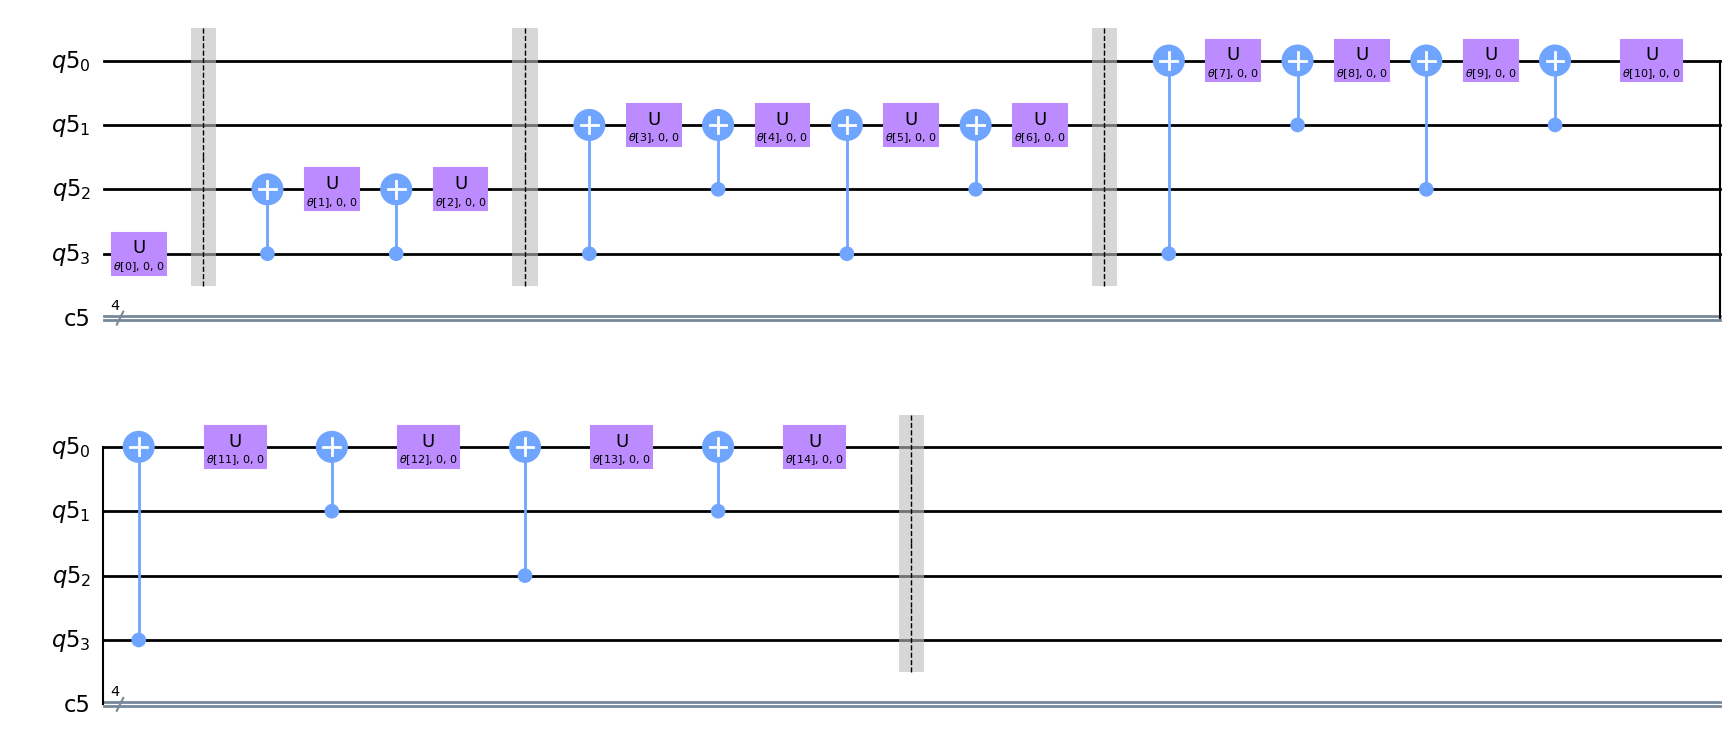

In [12]:
circuit.construct_circuit().draw('mpl') 